## Unmessenger Assignmnet 4 - Airbnb Data Visualization Project.

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [6]:
# Read in the dataset
airbnb = pd.read_csv("C:\\Users\\Santosh Jaiswal MDRT\\Downloads\\Unmessenger Assignments\\1206 Assignment 4\\Airbnb_Dataset.csv",encoding='latin-1')

In [7]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & Quiet Apt Home By The Park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,The Village Of Harlem New York,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor Of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft By Central Park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


In [8]:
# Converted Data type of last_review column 
airbnb["last_review"] = pd.to_datetime(airbnb["last_review"],dayfirst=True)

airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              249 non-null    int64         
 1   name                            249 non-null    object        
 2   host_id                         249 non-null    int64         
 3   host_name                       249 non-null    object        
 4   neighbourhood_group             249 non-null    object        
 5   neighbourhood                   249 non-null    object        
 6   latitude                        249 non-null    float64       
 7   longitude                       249 non-null    float64       
 8   room_type                       249 non-null    object        
 9   price                           249 non-null    int64         
 10  minimum_nights                  249 non-null    int64         
 11  number

In [9]:
# Print data types of DataFrame
airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [10]:
# Print number of missing values
airbnb.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       7
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
# Print description of DataFrame
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,249.000000,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000,242,249.000000,249.000000,249.000000
mean,31376.771084,1.499884e+05,40.730257,-73.964044,143.971888,8.718876,103.445783,2018-10-09 06:26:46.611570176,1.060964,1.738956,198.538153
min,2539.000000,2.787000e+03,40.631880,-74.080880,35.000000,1.000000,0.000000,2011-04-25 00:00:00,0.000000,1.000000,0.000000
25%,15711.000000,5.014800e+04,40.688430,-73.984980,85.000000,2.000000,21.000000,2018-12-30 06:00:00,0.260000,1.000000,75.000000
50%,28321.000000,9.779700e+04,40.721620,-73.964280,125.000000,3.000000,73.000000,2019-06-05 00:00:00,0.770000,1.000000,225.000000
75%,46911.000000,1.936370e+05,40.761930,-73.948220,175.000000,5.000000,166.000000,2019-06-23 00:00:00,1.650000,2.000000,310.000000
max,62430.000000,6.197784e+06,40.867540,-73.765970,800.000000,200.000000,467.000000,2019-07-07 00:00:00,4.720000,6.000000,365.000000
std,18101.018309,4.010393e+05,0.049660,0.029685,91.442975,20.398680,100.337887,NaN,1.002393,1.234635,126.048056


In [12]:
# Print header of columns to check the datetime format.
airbnb[['last_review']].head()

,last_review
0,2018-10-19
1,2019-05-21
2,NaT
3,2019-07-05
4,2018-11-19


In [13]:
# Print unique values of `room_type`
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## Let's Start with Data Visualization

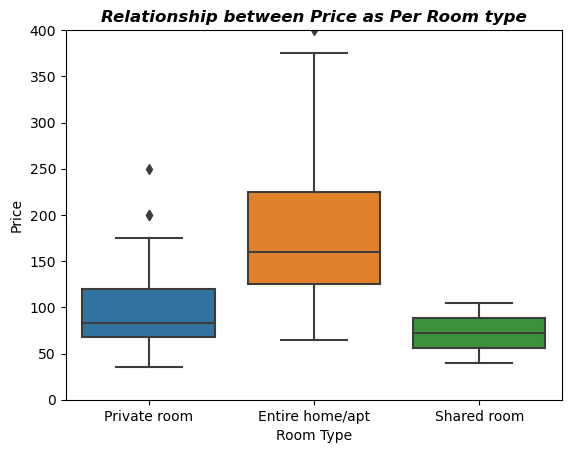

In [14]:
# Visualize relationship between price and room_type
sns.boxplot(x = 'room_type', y = 'price', data = airbnb)
plt.title('The boxplot shows that the highest room prices are for Entire home/apt, while the lowest prices are for Shared room.
The Entire home/apt category has a few outliers that are significantly higher than the average price.
The Private room category also has a few outliers that are outside the average price range.', fontsize=12, fontweight='bold', fontstyle='italic')
plt.ylim(0, 400)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

* The boxplot shows that the highest room prices are for Entire home/apt, while the lowest prices are for Shared room.
* The Entire home/apt category has a few outliers that are significantly higher than the average price.
* The Private room category also has a few outliers that are outside the average price range.

<function matplotlib.pyplot.show(close=None, block=None)>

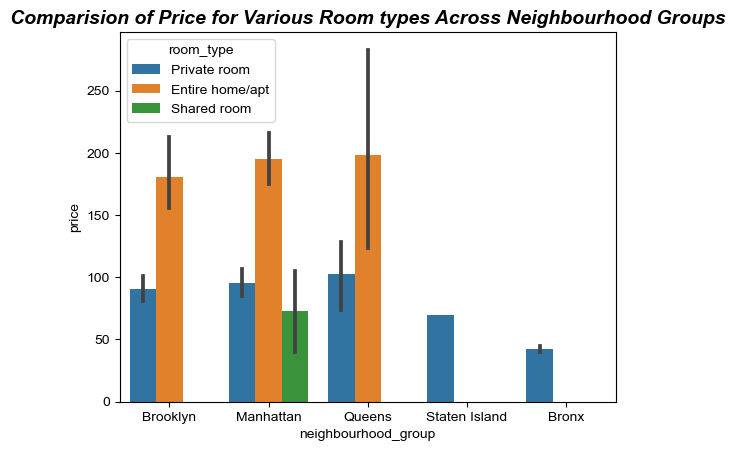

In [15]:
sns.barplot(x = "neighbourhood_group" , y = "price", hue = "room_type" , data = airbnb)
plt.title('Comparision of Price for Various Room types Across Neighbourhood Groups', fontsize=14, fontweight='bold', fontstyle='italic')
sns.set(rc={'figure.figsize':(16,5)})
plt.show

* By seeing the above graph we can see that Queens & Manhattan neighbourhood group almost have highest and similar price for Entire home/apt room type and Bronx have the lowest price of Private room compared to other neighbourhood group.
* Price Differences by Neighborhood: The graph shows that room prices can vary significantly depending on the neighborhood. Some neighborhoods have higher prices for all room types, while others are more affordable.
* Room Type Trends: Entire homes/apartments are generally the most expensive across all neighborhoods, while shared rooms tend to be the cheapest. This pattern is consistent regardless of the neighborhood.

<function matplotlib.pyplot.show(close=None, block=None)>

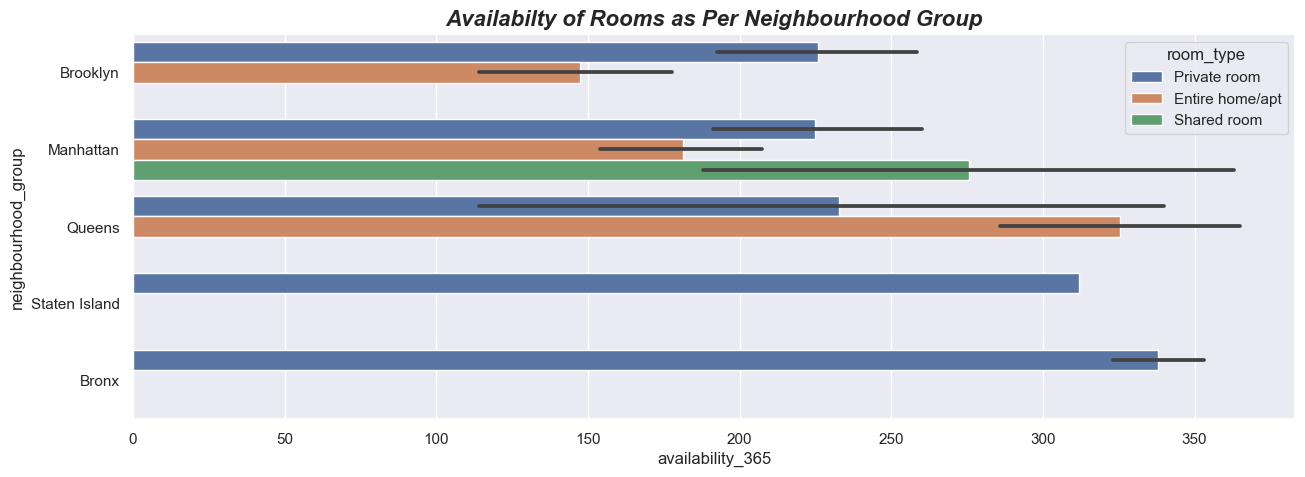

In [16]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x = "availability_365" , y = "neighbourhood_group", hue = "room_type", data= airbnb)
plt.title('Availabilty of Rooms as Per Neighbourhood Group', fontsize=16, fontweight='bold', fontstyle='italic')
plt.show

* The graph shows that the highest availability for private rooms is in the Bronx neighborhood group.
* For Entire home/apartments, the maximum availability is in the Queens neighborhood group.
* Shared rooms are less available overall compared to private rooms and entire homes/apartments.
* Availability trends can help travelers understand where they might find more options for their preferred room type.

<function matplotlib.pyplot.show(close=None, block=None)>

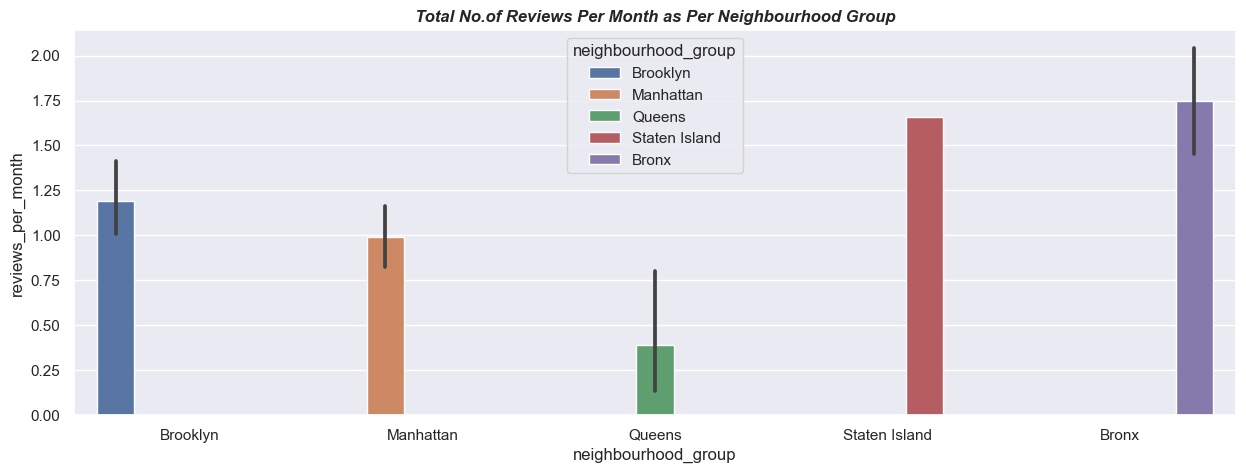

In [17]:
sns.barplot(x = "neighbourhood_group" , y = "reviews_per_month", hue = "neighbourhood_group", data= airbnb)
plt.title('Total No.of Reviews Per Month as Per Neighbourhood Group', fontsize=12, fontweight='bold', fontstyle='italic')
plt.show

* The graph shows that the highest number of reviews per month comes from the Bronx neighborhood group.
* The lowest number of reviews per month is from the Queens neighborhood group.
* A higher number of reviews per month can indicate a more active and frequently visited area.
* Understanding review frequency can help hosts improve their services and travelers choose more popular and well-reviewed areas.

<function matplotlib.pyplot.show(close=None, block=None)>

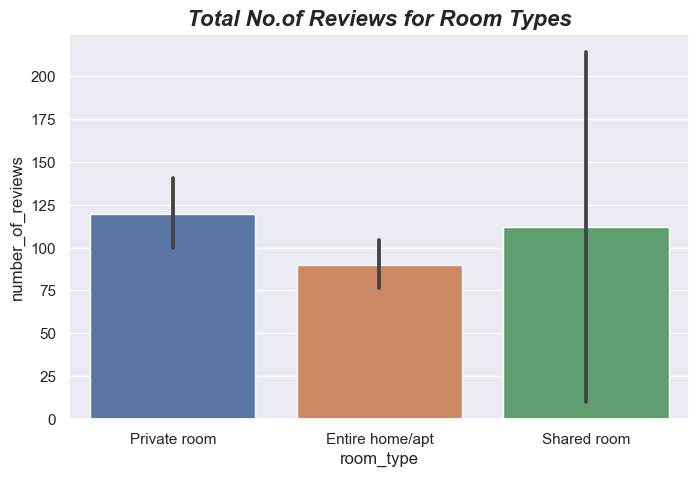

In [18]:
plt.figure(figsize=(8,5))
plt.title('Total No.of Reviews for Room Types', fontsize=16, fontweight='bold', fontstyle='italic')
sns.barplot(data = airbnb, x = 'room_type', y = 'number_of_reviews')
plt.show

* The number of reviews for Private rooms and Shared rooms is almost the same.
* Reviews for Entire home/apartments are fewer compared to Private rooms and Shared rooms.
* This pattern suggests that Private rooms and Shared rooms might be more frequently booked or visited, leading to similar review counts.

<function matplotlib.pyplot.show(close=None, block=None)>

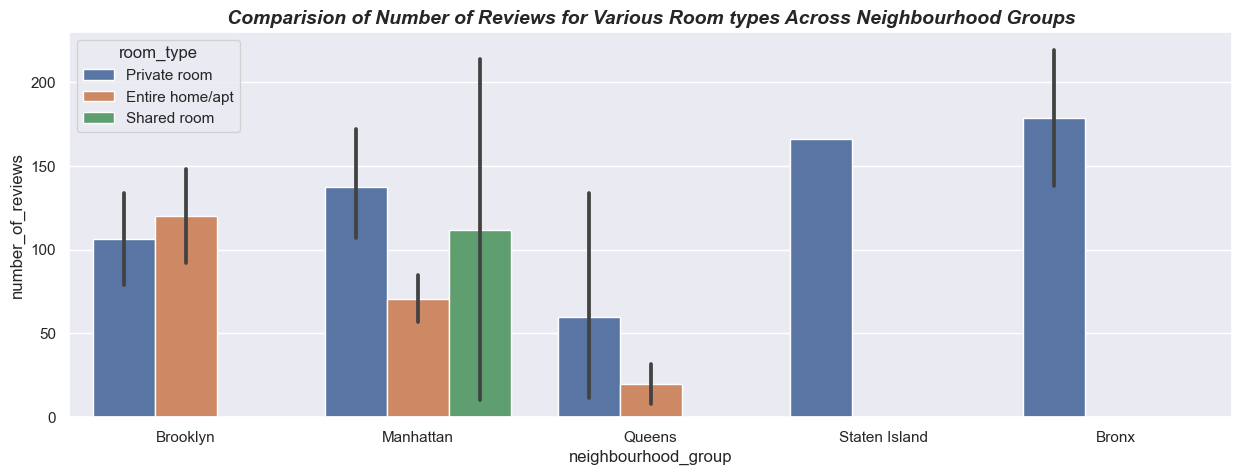

In [19]:
sns.barplot(x = "neighbourhood_group" , y = "number_of_reviews", hue = "room_type" , data = airbnb)
plt.title('', fontsize=14, fontweight='bold', fontstyle='italic')
sns.set(rc={'figure.figsize':(16,5)})
plt.show

* The barplot shows that the highest number of reviews is for private rooms.
* Staten Island and the Bronx have the most reviews for private rooms, while Queens has the least among neighborhood groups.
* Brooklyn shows the highest number of reviews for Entire home/apartments, with Queens having the fewest.
* Shared rooms primarily have reviews from Manhattan.
* Understanding the review patterns can help hosts and property managers optimize their listings and services to attract more guests and improve guest satisfaction.

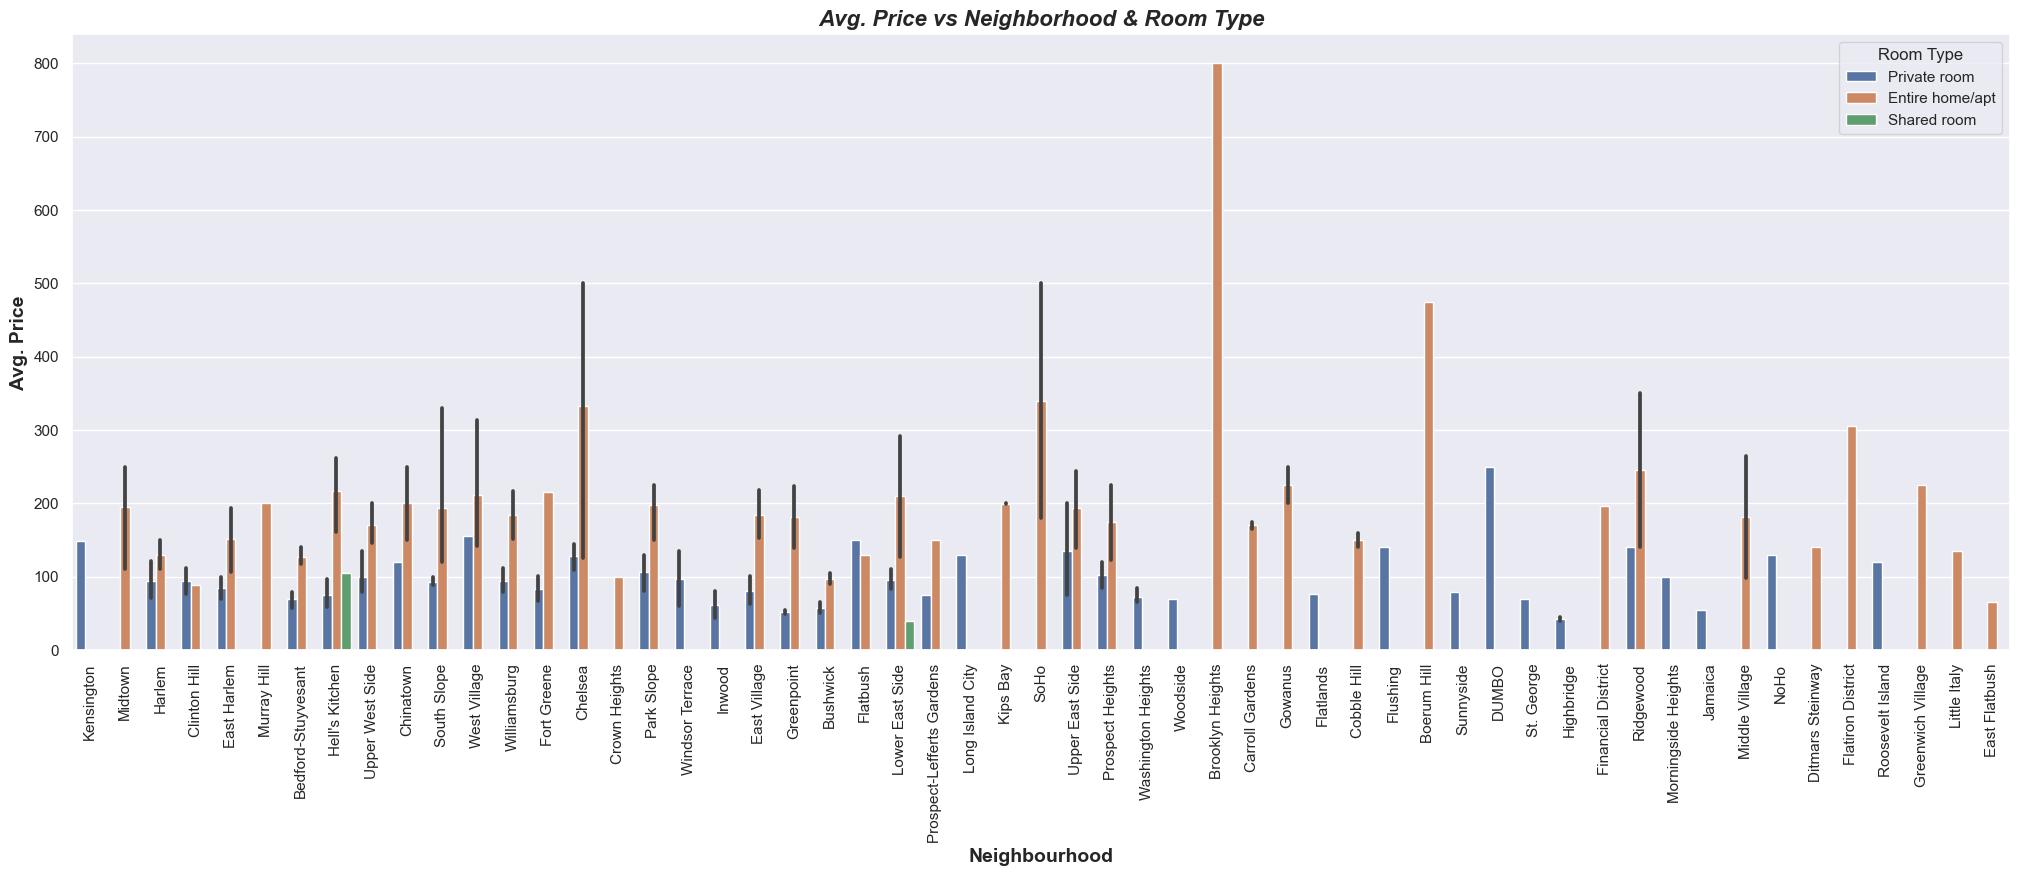

In [20]:
plt.figure(figsize=(25,8))
sns.barplot(data = airbnb, x = 'neighbourhood', y = 'price', hue = 'room_type')
plt.xticks(rotation = 90)
plt.title('', fontsize=16, fontweight='bold', fontstyle='italic')
plt.xlabel('Neighbourhood', fontsize=14, fontweight='bold')
plt.ylabel('Avg. Price', fontsize=14, fontweight='bold')
plt.legend(title = 'Room Type', loc='upper right')
plt.show()

* The average price of Entire home/apartments is highest in Brooklyn Heights and lowest in East Flatbush.
* The average price of Private rooms is highest in DUMBO and lowest in Highbridge.
* Shared rooms are available in only two neighborhoods: Hell's Kitchen and Lower East Side.
* Neighborhoods with higher average prices for Entire home/apartments, such as Brooklyn Heights, often reflect desirable locations with premium amenities or views.
* Lower average prices in neighborhoods like East Flatbush for Entire home/apartments may indicate more affordable housing options or less central locations.
* The limited availability of Shared rooms in only two neighborhoods suggests a niche market for this room type in specific areas known for their dining, entertainment, or cultural scenes.

<function matplotlib.pyplot.show(close=None, block=None)>

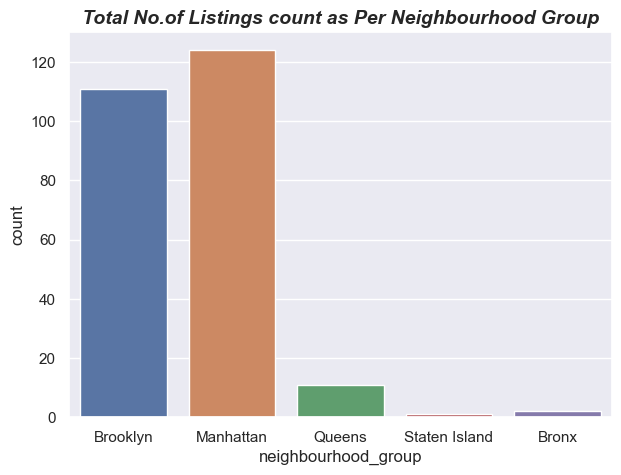

In [21]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot( data = airbnb, x = "neighbourhood_group")
plt.title('Total No.of Listings count as Per Neighbourhood Group', fontsize=14, fontweight='bold', fontstyle='italic')
plt.show

* The areas with the most number of listings are Manhattan and Brooklyn, while the least number of listings are from Bronx and Staten Island.
* This distribution reflects the higher demand and concentration of Airbnb accommodations in Manhattan and Brooklyn, likely due to their popularity and central locations.
* Neighborhoods with fewer listings, such as Bronx and Staten Island, may offer a more limited selection but could also provide opportunities for less crowded and potentially more affordable accommodations.
* Understanding the distribution of listings across neighborhoods helps travelers choose areas with more options that suit their preferences and budget.

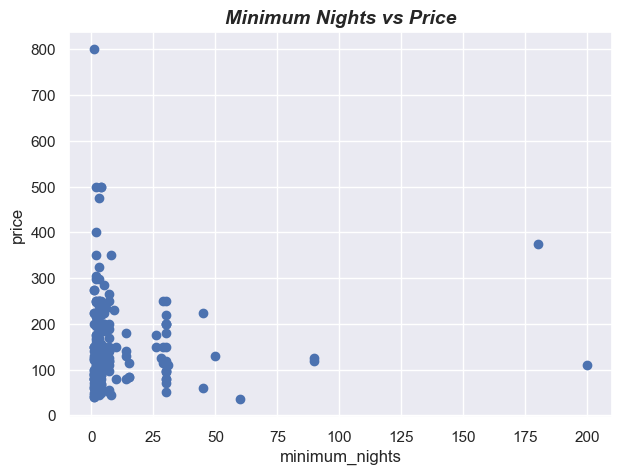

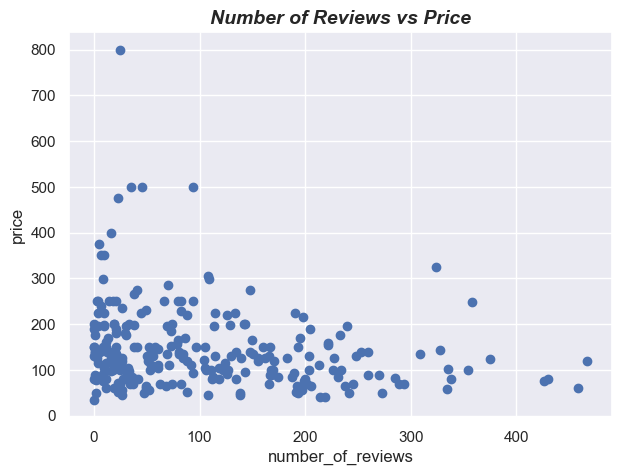

In [22]:
# Minimum nights vs Price
plt.scatter(airbnb["minimum_nights"], airbnb["price"])
plt.xlabel('minimum_nights')
plt.ylabel('price')
plt.title('Minimum Nights vs Price', fontsize=14, fontweight='bold', fontstyle='italic')
plt.show()

# Number of Reviews vs Price
plt.scatter(airbnb["number_of_reviews"], airbnb["price"])
plt.xlabel('number_of_reviews')
plt.ylabel('price')
plt.title('Number of Reviews vs Price', fontsize=14, fontweight='bold', fontstyle='italic')
plt.show()

* From the above scatter plots, it's shows that there is a preference for listings with lower prices, as they tend to attract more interest from guests.
* Minimum Nights vs Price: Listings with lower prices often have shorter minimum night requirements, appealing to travelers looking for shorter stays or more flexible booking options.
* Number of Reviews vs Price: Lower-priced listings typically accumulate more reviews, indicating higher occupancy rates and potentially better value for guests.
* Understanding these trends can help hosts optimize pricing strategies and adjust minimum stay requirements to attract more bookings and positive reviews.

## Thank you